In [212]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_excel('translation.xlsx')

In [214]:
df.head()

,Original Review,Translated Review
0,速度真的不行，開個戶等到天荒地老，第一次在銀行裡等這麼久，實在不知道為什麼會那麼沒效率耶,The speed is really not good. I waited forever...
1,電話客服找不到真人\n行員自己都不知道信用卡專線\n四個櫃檯不知道在瞎忙什麼\n門口警衛都要睡著了,The customer service staff couldn&#39;t find a...
2,不知道是只有這間渣打服務很爛，還是渣打本來就很爛，總之第一次去就讓人覺得渣打服務爛到讓人不想...,I don’t know if it’s just this Standard Charte...
3,電話無法提供服務，又無法去分行辦理業務,"The phone cannot provide service, and it is im..."
4,打電話都不接，客服電話要等到天荒地老！,"I don&#39;t even answer the phone calls, and I..."


In [215]:
df.info

<bound method DataFrame.info of                                        Original Review  \
0         速度真的不行，開個戶等到天荒地老，第一次在銀行裡等這麼久，實在不知道為什麼會那麼沒效率耶   
1    電話客服找不到真人\n行員自己都不知道信用卡專線\n四個櫃檯不知道在瞎忙什麼\n門口警衛都要睡著了   
2    不知道是只有這間渣打服務很爛，還是渣打本來就很爛，總之第一次去就讓人覺得渣打服務爛到讓人不想...   
3                                  電話無法提供服務，又無法去分行辦理業務   
4                                  打電話都不接，客服電話要等到天荒地老！   
..                                                 ...   
926                      等超級久\n只是去換個存摺\n13:35辦到14:28 …   
927  很可憐的處理方式，今天要開戶，抽卡機寫等候人數0，等了半小時受不了去問櫃台，然後說今天額滿，...   
928          天啊‼️\n電話連續打了快1小時，\n沒人接‼️沒人接‼️沒人接‼️\n人呢😱 …   
929                                   服務態度很好，就是電話總是沒人接   
930          你們家ATM到底要壞幾次？\n\n之前2台變成1台，又一天到晚壞掉，每次來都很火大   

                                     Translated Review  
0    The speed is really not good. I waited forever...  
1    The customer service staff couldn&#39;t find a...  
2    I don’t know if it’s just this Standard Charte...  
3    The phone cannot provide service, and 

In [216]:
df.shape

(931, 2)

In [217]:
df.isnull().sum()

Original Review      0
Translated Review    0
dtype: int64

In [218]:
reviews = [x for x in df['Translated Review']]

In [219]:
reviews

['The speed is really not good. I waited forever to open an account. It’s the first time I’ve waited so long in a bank. I really don’t know why it’s so inefficient.',
 'The customer service staff couldn&#39;t find a real person on the phone. I didn&#39;t even know the credit card line. The four counters were busy and the guard at the door was almost asleep.',
 'I don’t know if it’s just this Standard Chartered that has bad service, or if Standard Chartered is inherently bad. In short, the first time I went there, I felt that Standard Chartered’s service was so bad that I didn’t want to use it. The first time I arrived at 14:40 I wanted to open an account, but they gave me a bunch of excuses and didn&#39;t want to accept it at all. Later I decided to give up and come earlier next time. …',
 'The phone cannot provide service, and it is impossible to go to the branch to handle business.',
 'I don&#39;t even answer the phone calls, and I have to wait until eternity to call customer service

In [220]:
# remove emails, urls, punctuations, and turn texts to lowercase
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation
preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]

In [221]:
reviews = [preprocess_text(review, preprocess_functions) for review in reviews]

In [222]:
import re

# remove specific punctuation
reviews = [re.sub('[~.,%/:;?_&+*=!-]', ' ', review) for review in reviews]

reviews = [re.sub('[0-9]', ' ', review) for review in reviews]

# remove the emojis
emoji = re.compile("["
u"\U0001F600-\U0001F64F"
u"\U0001F300-\U0001F5FF"
u"\U0001F680-\U0001F6FF"
u"\U0001F1E0-\U0001F1FF"
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
"]+", flags=re.UNICODE)

reviews = [re.sub(emoji, ' ', review) for review in reviews]
# remove the non-english characters
non_eng = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5., ,?""]+', re.UNICODE)

reviews = [re.sub(non_eng, ' ', review) for review in reviews]

In [223]:
df['Preprocessing_Review'] = reviews

In [224]:
df['Preprocessing_Review'].head()

0    the speed is really not good i waited forever ...
1    the customer service staff couldn  t find a re...
2    i don t know if it s just this standard charte...
3    the phone cannot provide service and it is imp...
4    i don  t even answer the phone calls and i hav...
Name: Preprocessing_Review, dtype: object

In [225]:
# Removing all the reviews,less than 1 words
df = df[df['Preprocessing_Review'].apply(lambda x: len(x.split())>1)]
print("Total number of reviews after removal of reviews with short words:", df.shape[0])

# Checking and removing all the duplicates
df.sort_values('Preprocessing_Review',inplace=True, ascending=False)
# keep='first' (default): Mark all duplicates as True except for the first occurrence.
# keep='last': Mark all duplicates as True except for the last occurrence.
# keep=False: Mark all duplicates as True. This means that all aoccurrences of a duplicate item are marked, not just the repeats.
df[df["Preprocessing_Review"].duplicated(keep='first')]
duplicated_df = df.duplicated('Preprocessing_Review', keep = 'first')
df = df[~duplicated_df]
print("Total number of reviews after removing duplicates:", df.shape[0])

Total number of reviews after removal of reviews with short words: 914
Total number of reviews after removing duplicates: 900


/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_94024/134382588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('Preprocessing_Review',inplace=True, ascending=False)


In [226]:
df.head()

,Original Review,Translated Review,Preprocessing_Review
614,貴銀行可能做非常大，問一堆就算\n還問為什麼我們不在我們家附近銀行辦？難怪評價極差 ..不就...,"Your bank may be very big, and even if you ask...",your bank may be very big and even if you ask ...
634,要挑對時間，早點來，完全不用排隊，櫃檯林小姐也很客氣，難得很棒的銀行體驗！,You have to choose the right time and come ear...,you have to choose the right time and come ear...
892,不用等太久，行員服務親切速度也很快,"You don’t have to wait too long, the staff’s s...",you don t have to wait too long the staff s se...
908,昨天早上要聯絡銀行人員詢問匯款事項，打電話過去永遠沒人接；真不知網路上那電話是放好看的？,Yesterday morning I had to contact the bank st...,yesterday morning i had to contact the bank st...
724,昨天早上來更換金融卡\n等待區域有好坐的沙發和輕音樂，環境舒適\n櫃檯小姐和警衛大哥辦事也很...,Yesterday morning I came to change my debit ca...,yesterday morning i came to change my debit ca...


In [227]:
df_temp = df[['Translated Review', 'Preprocessing_Review']].copy()
df_temp.reset_index(drop=True, inplace=True)

In [228]:
df_temp.head()

,Translated Review,Preprocessing_Review
0,"Your bank may be very big, and even if you ask...",your bank may be very big and even if you ask ...
1,You have to choose the right time and come ear...,you have to choose the right time and come ear...
2,"You don’t have to wait too long, the staff’s s...",you don t have to wait too long the staff s se...
3,Yesterday morning I had to contact the bank st...,yesterday morning i had to contact the bank st...
4,Yesterday morning I came to change my debit ca...,yesterday morning i came to change my debit ca...


In [229]:
import nltk

# lemmatize the reviews
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    str = ' '
    data = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return str.join(data)

df_temp['Preprocessing_Review'] = df_temp.Preprocessing_Review.apply(lemmatize_text)

print(lemmatizer.lemmatize('moods'))

mood


In [230]:
df_temp.head()

,Translated Review,Preprocessing_Review
0,"Your bank may be very big, and even if you ask...",your bank may be very big and even if you ask ...
1,You have to choose the right time and come ear...,you have to choose the right time and come ear...
2,"You don’t have to wait too long, the staff’s s...",you don t have to wait too long the staff s se...
3,Yesterday morning I had to contact the bank st...,yesterday morning i had to contact the bank st...
4,Yesterday morning I came to change my debit ca...,yesterday morning i came to change my debit ca...


In [231]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cleaning and removing the above stop words list from reviews
stop_words = stopwords.words('english')
new_stopwords = ["wa", "one"]
stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df_temp['Preprocessing_Review'] = df_temp['Preprocessing_Review'].apply(lambda text: cleaning_stopwords(text))
df_temp['Preprocessing_Review'].head(30)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/youweicheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0     bank may big even ask lot question bank near h...
1     choose right time come early queue lin counter...
2                 wait long staff service friendly fast
3     yesterday morning contact bank staff inquire r...
4     yesterday morning came change debit card nice ...
5     yesterday today due business need took initiat...
6     yang xiangli bank clerk huang friendly efficie...
7                 xinxing branch disappeared google map
8     worst banking service came open saving account...
9                        work efficiency extremely poor
10                                answering switchboard
11               troublesome join taiwan mobile payment
12    ha answered phone question want ask robot menu...
13    number cash machine change inconvenient additi...
14    log using graphic every time update bank app n...
15    call service staff business closed touchup fun...
16    wasting people time calling number half hour o...
17    waiting old gentleman communicating bank c

In [232]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Bag of Words Analysis
def bag_of_words_analysis(texts):
    """
    This function performs Bag of Words analysis and plots the top 10 frequent words.
    """
    word_counts = Counter()
    for text in texts:
        word_counts.update(text.split())

    most_common = word_counts.most_common(10)
    words, counts = zip(*most_common)

    # Plotting
    plt.bar(words, counts)
    for i, (a, b) in enumerate(zip(words, counts)):
        plt.text(a, b, "%.0f" % counts[i], ha='center', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.title("Top 10 Most Frequent Words")
    plt.show()

    return most_common

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TF-IDF Analysis

def tf_idf_analysis(texts):
    """
    This function performs TF-IDF analysis and plots the top 10 words with highest TF-IDF scores.
    """
    # import TfidVectorizer() to do TF-IDF analysis
    vectorizer = TfidfVectorizer()
    # build up matrix
    tfidf_matrix = vectorizer.fit_transform(texts)
    # get every feature names
    feature_array = np.array(vectorizer.get_feature_names_out())
    # get maximal values of TF-IDF from each row(axis=0), transform to array, tehn flatten the values
    tfidf_scores = tfidf_matrix.max(axis=0).toarray().flatten()


    # Sort TF-IDF scores in descending order and get top 10 indices
    top_n_indices = np.argsort(tfidf_scores)[::-1][:10]


    # Get top 10 words and their TF-IDF scores
    top_n_words = feature_array[top_n_indices]
    top_n_scores = tfidf_scores[top_n_indices]


    # Plotting
    df = pd.DataFrame({'Word': top_n_words, 'TF-IDF': top_n_scores})
    df.plot.bar(x='Word', y='TF-IDF', rot=45, title="Top 10 Words with Highest TF-IDF Scores")
    plt.show()

    return top_n_words



/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

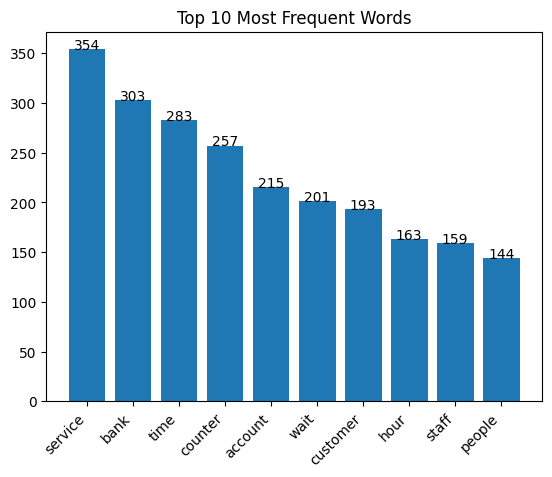

[('service', 354),
 ('bank', 303),
 ('time', 283),
 ('counter', 257),
 ('account', 215),
 ('wait', 201),
 ('customer', 193),
 ('hour', 163),
 ('staff', 159),
 ('people', 144)]

In [233]:
bag_of_words_analysis(df_temp['Preprocessing_Review'])

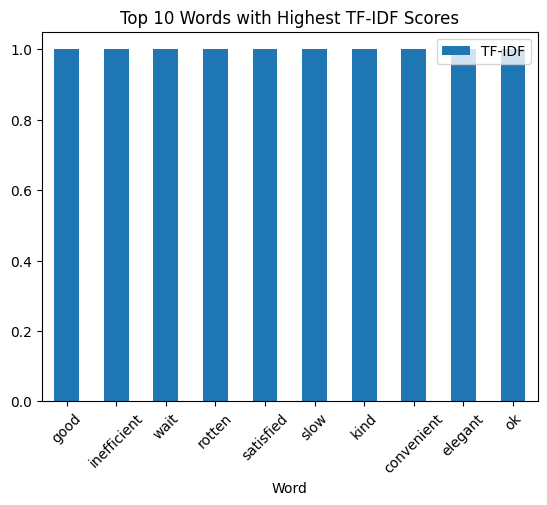

array(['good', 'inefficient', 'wait', 'rotten', 'satisfied', 'slow',
       'kind', 'convenient', 'elegant', 'ok'], dtype=object)

In [234]:
tf_idf_analysis(df_temp['Preprocessing_Review'])

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np



# TF-IDF method
# Vectorize the reviews using TF-IDF, note min_df could be 0 in the previous version but now it must be larger than 0
# min_df: used for removing terms that appear too infrequently.
# ignore terms that appear in less than 5% of the document
tfidf_review_vectorizer = TfidfVectorizer(min_df=0.05)
tfidf_review_features = tfidf_review_vectorizer.fit_transform(df_temp['Preprocessing_Review'])
# print(tfidf_review_features)

# Function to find similar reviews based on TF-IDF
def tfidf_based_model(row_index, num_similar_items):
    # Calculate Euclidean distances from the given review
    couple_dist = pairwise_distances(tfidf_review_features, tfidf_review_features[row_index])
    # Get indices of reviews with the smallest distances
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    print(indices)

    # Create a DataFrame for the similar reviews
    df_new = pd.DataFrame({
        'Review': df_temp['Preprocessing_Review'][indices].values,
        'Euclidean similarity': couple_dist[indices].ravel()
    })

    # Display queried review details
    print("="*30, "Queried Review Details", "="*30)
    print('Review:', df_temp['Preprocessing_Review'][indices[0]])

    # Display recommended similar reviews
    print("\n", "="*25, "Recommended Reviews:", "="*25)
    return df_new.iloc[1:,]  # Exclude the queried review from the recommendations


tfidf_based_model(30, 11)

[ 30 273 274 363 340 624  28 269 339 499 276]
============================== Queried Review Details ==============================
Review: handling small matter counter various application counter waited hour people front counter counter seriously inefficient

 ========================= Recommended Reviews: =========================


,Review,Euclidean similarity
1,lady counter greeted nice,0.508356
2,lady counter patient professional helped solve...,0.508356
3,aunt counter difficult talk weirdly talking elder,0.508356
4,counter lady supervisor helpful efficient comp...,0.508356
5,someone complains bank counter counter opened ...,0.652478
6,asked loan document specialist said ask counte...,0.765754
7,location difficult park counter two specialist...,0.776666
8,counter move slowly take least minute process ...,0.800615
9,qiu service counter attentive professional,0.820890
10,lady counter extremely inefficient doe thing m...,0.843569


In [236]:
# %pip install gensim
# %pip install scipy==1.10.1
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np
from sklearn.metrics import pairwise_distances

# Word2vec
# Load the Word2Vec model

word2vec_model = api.load('word2vec-google-news-300')
# df_temp = df.copy()
# Ensure the model is KeyedVectors for consistency
assert isinstance(word2vec_model, KeyedVectors)
vocabulary = set(word2vec_model.index_to_key)

# Function to create averaged Word2Vec vectors for reviews
def average_word_vectors(review, model, vocabulary, num_features):
    words = review.split()
    feature_vector = np.mean([model[word] for word in words if word in vocabulary] or [np.zeros(num_features)], axis=0)
    return feature_vector

# Apply function to each headline
w2v_reviews = np.array([average_word_vectors(review, word2vec_model, vocabulary, 300) for review in df_temp['Preprocessing_Review']])

# Function to find similar reviews based on average Word2Vec vectors
def avg_w2v_based_model(row_index, num_similar_items):
    distances = pairwise_distances(w2v_reviews, w2v_reviews[row_index].reshape(1, -1))
    indices = np.argsort(distances.ravel())[0:num_similar_items]

    # Create DataFrame for displaying results
    similar_reviews = pd.DataFrame({
        'Review': df_temp['Preprocessing_Review'][indices].values,
        'Euclidean similarity': distances[indices].ravel()
    })

    # Display details of the queried review
    print("="*30, "Queried Review Details", "="*30)
    print('review:', df_temp['Preprocessing_Review'][indices[0]])

    # Display recommended reviews
    print("\n", "="*25, "Recommended Reviews:", "="*25)
    return similar_reviews.iloc[1:,]


avg_w2v_based_model(30, 11)

============================== Queried Review Details ==============================
review: handling small matter counter various application counter waited hour people front counter counter seriously inefficient

 ========================= Recommended Reviews: =========================


,Review,Euclidean similarity
1,counter move slowly take least minute process ...,0.634801
2,someone complains bank counter counter opened ...,0.701418
3,counter open minute passed group people counte...,0.726166
4,lady counter kind three counter occupied took ...,0.731103
5,number given asked wait counter nearly minute ...,0.760758
6,slothlike service counter number clearly marke...,0.761679
7,separate counter open account right many peopl...,0.762991
8,guard bad attitude drag walking bank even care...,0.774406
9,lady counter extremely inefficient doe thing m...,0.778882
10,waiting time open account long mechanism openi...,0.787757


In [237]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/youweicheng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [238]:
sia = SIA() 
df_temp['sentiment_score'] = [sia.polarity_scores(x)['compound'] for x in df['Preprocessing_Review']]

In [239]:
df_temp

,Translated Review,Preprocessing_Review,sentiment_score
0,"Your bank may be very big, and even if you ask...",bank may big even ask lot question bank near h...,-0.6696
1,You have to choose the right time and come ear...,choose right time come early queue lin counter...,0.6249
2,"You don’t have to wait too long, the staff’s s...",wait long staff service friendly fast,0.4939
3,Yesterday morning I had to contact the bank st...,yesterday morning contact bank staff inquire r...,0.3716
4,Yesterday morning I came to change my debit ca...,yesterday morning came change debit card nice ...,0.8828
...,...,...,...
895,"A bank suitable for opening in Southeast Asia,...",bank suitable opening southeast asia lazy pace...,-0.0516
896,// Five-star security // Because the ATM card ...,fivestar security atm card invalid want go cou...,0.7506
897,🇹🇼 What 🤔 is so convenient for Premier custome...,convenient premier customer,0.0000
898,🌈🌈🌈 The service is so bad. What is excellent f...,service bad excellent financial management ser...,-0.2002


Text(0.5, 1.0, 'Sentiment Score Distribution')

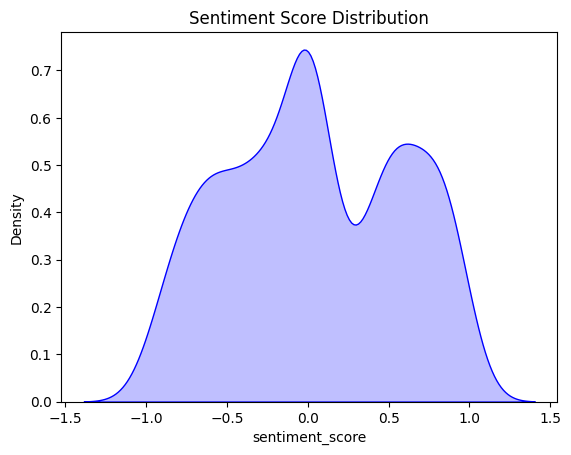

In [240]:
# plot the sentiment score distribution

sns.kdeplot(df_temp['sentiment_score'],fill=True,color="b")
plt.title('Sentiment Score Distribution')

In [241]:
# lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
# positive sentiment : (compound score >= 0.05) 
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment : (compound score <= -0.05)

def label_sentiment(x):
  if x <= 0:
    return 'negative'
  elif x >= 0.5:
    return 'positive'
  else:
    return 'neutral'
  
df_temp['sentiment'] = df_temp['sentiment_score'].apply(label_sentiment)

In [242]:
df_temp

,Translated Review,Preprocessing_Review,sentiment_score,sentiment
0,"Your bank may be very big, and even if you ask...",bank may big even ask lot question bank near h...,-0.6696,negative
1,You have to choose the right time and come ear...,choose right time come early queue lin counter...,0.6249,positive
2,"You don’t have to wait too long, the staff’s s...",wait long staff service friendly fast,0.4939,neutral
3,Yesterday morning I had to contact the bank st...,yesterday morning contact bank staff inquire r...,0.3716,neutral
4,Yesterday morning I came to change my debit ca...,yesterday morning came change debit card nice ...,0.8828,positive
...,...,...,...,...
895,"A bank suitable for opening in Southeast Asia,...",bank suitable opening southeast asia lazy pace...,-0.0516,negative
896,// Five-star security // Because the ATM card ...,fivestar security atm card invalid want go cou...,0.7506,positive
897,🇹🇼 What 🤔 is so convenient for Premier custome...,convenient premier customer,0.0000,negative
898,🌈🌈🌈 The service is so bad. What is excellent f...,service bad excellent financial management ser...,-0.2002,negative


/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

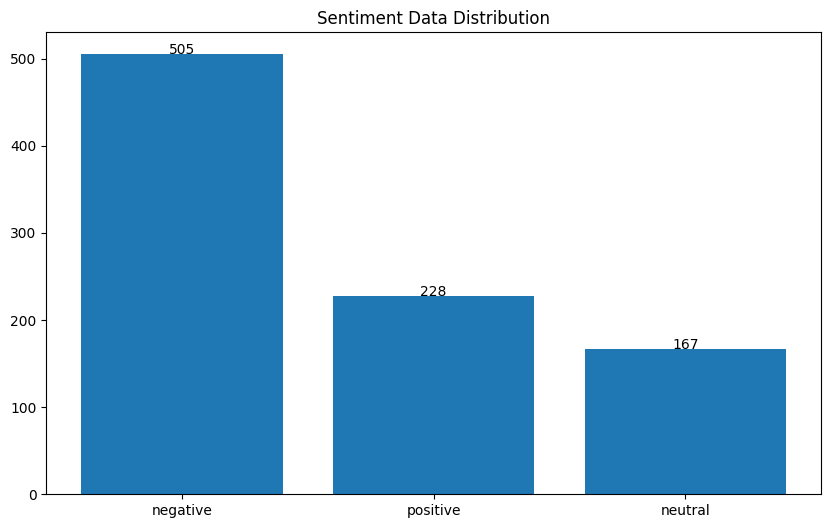

In [243]:
# plot the sentiment data distribution

val_count = df_temp.sentiment.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(val_count.index, val_count.values)
plt.title('Sentiment Data Distribution')

for i, (a, b) in enumerate(zip(val_count.index, val_count.values)):
    plt.text(a, b , "%.0f" % val_count.values[i], ha='center', fontsize=10)

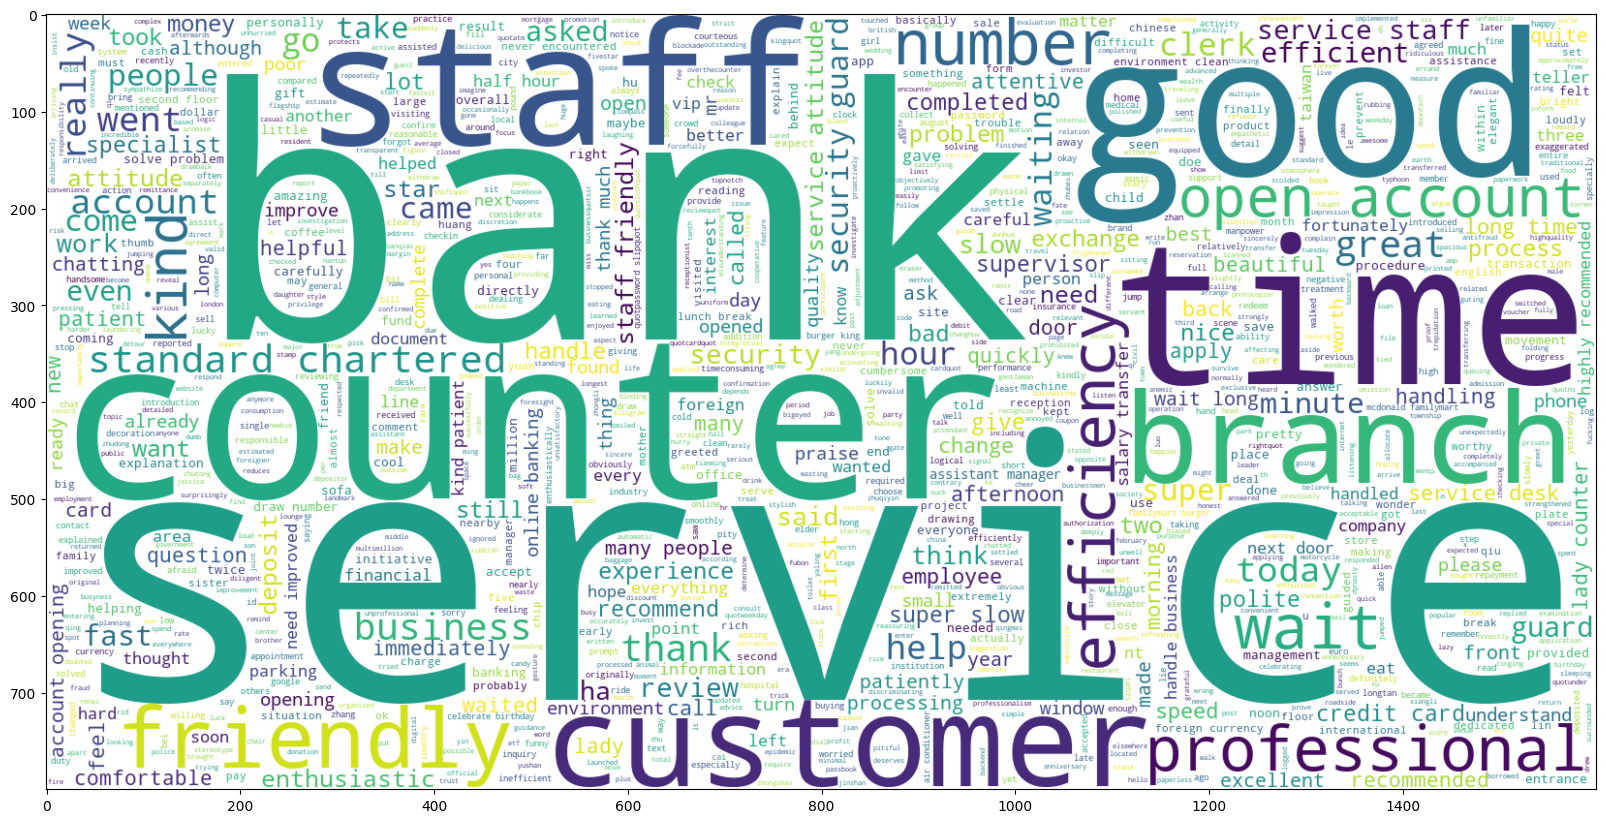

In [244]:
# plot the wordcloud of positive, negative and neutral reviews
# wa, one
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_temp[df_temp.sentiment == 'positive'].Preprocessing_Review))
plt.imshow(wc , interpolation = 'bilinear')

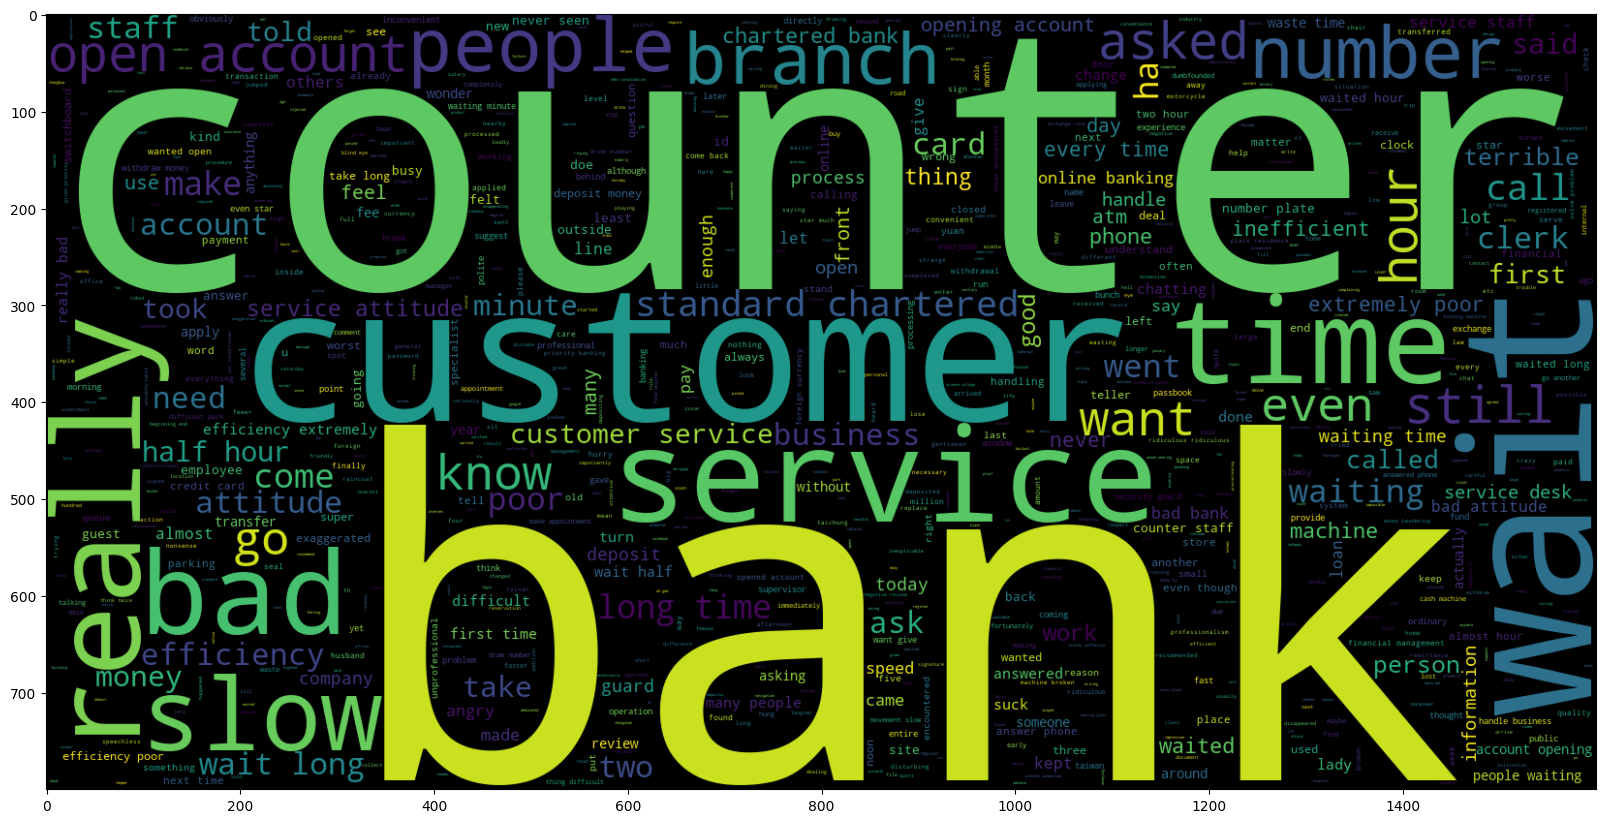

In [245]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df_temp[df_temp.sentiment == 'negative'].Preprocessing_Review))
plt.imshow(wc , interpolation = 'bilinear')

In [246]:
# Use pretrained model
# !pip install transformers torch
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

# Load pre-trained model and tokenizer
model_name = "j-hartmann/sentiment-roberta-large-english-3-classes"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):
    # Encode the text
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    # Forward pass, get logits
    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    negatvie_prob = scores[0]
    neutral_prob = scores[1]
    posotive_prob = scores[2]

    max_prob = max(negatvie_prob, neutral_prob, posotive_prob)

    if max_prob == negatvie_prob:
        sentiment = 'Negative'
    elif max_prob == neutral_prob:
        sentiment = 'Neutral'
    else:
        sentiment = 'Positive'
    
    return sentiment

# Example tweets
tweets = 'No comment'


sentiment_score(tweets)




Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer yo

'Neutral'

In [260]:
sentiment_score = [sentiment_score(review) for review in df['Preprocessing_Review']]

/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:2888: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [261]:
sentiment_score

['Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative'

In [262]:
df_temp['RoBERTa_sentiment'] = sentiment_score

/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:753: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated

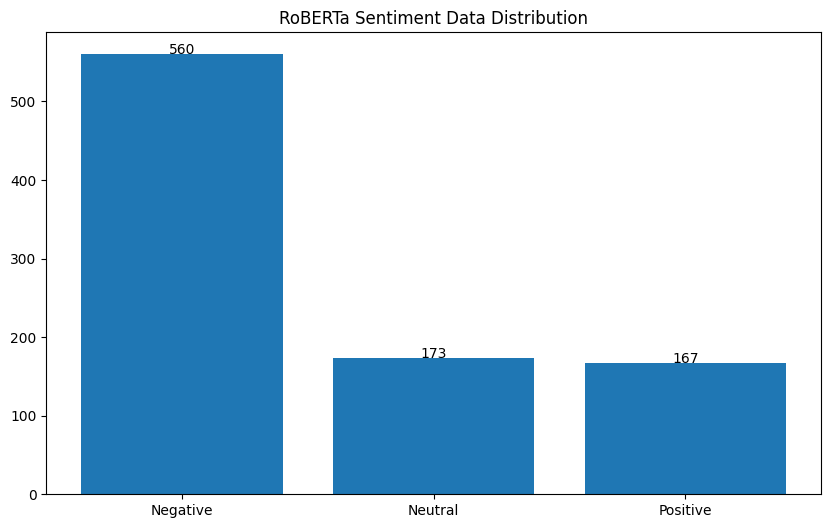

In [263]:
# plot the sentiment data distribution

val_count = df_temp.RoBERTa_sentiment.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(val_count.index, val_count.values)
plt.title('RoBERTa Sentiment Data Distribution')

for i, (a, b) in enumerate(zip(val_count.index, val_count.values)):
    plt.text(a, b , "%.0f" % val_count.values[i], ha='center', fontsize=10)

In [265]:
df_temp

,Translated Review,Preprocessing_Review,sentiment_score,sentiment,RoBERTa_sentiment
0,"Your bank may be very big, and even if you ask...","[bank, may, big, even, ask, lot, question, ban...",-0.6696,negative,Negative
1,You have to choose the right time and come ear...,"[choose, right, time, come, early, queue, lin,...",0.6249,positive,Positive
2,"You don’t have to wait too long, the staff’s s...","[wait, long, staff, service, friendly, fast]",0.4939,neutral,Positive
3,Yesterday morning I had to contact the bank st...,"[yesterday, morning, contact, bank, staff, inq...",0.3716,neutral,Negative
4,Yesterday morning I came to change my debit ca...,"[yesterday, morning, came, change, debit, card...",0.8828,positive,Positive
...,...,...,...,...,...
895,"A bank suitable for opening in Southeast Asia,...","[bank, suitable, opening, southeast, asia, laz...",-0.0516,negative,Neutral
896,// Five-star security // Because the ATM card ...,"[fivestar, security, atm, card, invalid, want,...",0.7506,positive,Neutral
897,🇹🇼 What 🤔 is so convenient for Premier custome...,"[convenient, premier, customer]",0.0000,negative,Neutral
898,🌈🌈🌈 The service is so bad. What is excellent f...,"[service, bad, excellent, financial, managemen...",-0.2002,negative,Negative


In [251]:
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
# %pip install spacy
import spacy
#vis
# %pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

In [252]:
# The LDA topic model algorithm requires a document word matrix and a dictionary as the main inputs.
# A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.
# A Dictionary is collection of all unique tokens present in documents.
# For generating the document-term matrix and dictionary, first we will convert our sentences into tokens using the fucntion mentioned below.

def generate_tokens(review):
    words=[]
    for word in review.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         
        if word!='':
           words.append(word)
    return words

df_temp['Preprocessing_Review']=df_temp.Preprocessing_Review.apply(generate_tokens)

In [253]:
df_temp['Preprocessing_Review'][0]

['bank',
 'may',
 'big',
 'even',
 'ask',
 'lot',
 'question',
 'bank',
 'near',
 'home',
 'wonder',
 'review',
 'bad',
 'counter',
 'look',
 'others',
 'okay',
 'u',
 'open',
 'account',
 'deposit',
 'money',
 'wherever',
 'want',
 'business']

In [254]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df_temp['Preprocessing_Review'])
print(id2word)

Dictionary<2246 unique tokens: ['account', 'ask', 'bad', 'bank', 'big']...>


In [255]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df_temp['Preprocessing_Review'],id2word)
print(df_temp['Preprocessing_Review'][0])
print(corpus[0])

['bank', 'may', 'big', 'even', 'ask', 'lot', 'question', 'bank', 'near', 'home', 'wonder', 'review', 'bad', 'counter', 'look', 'others', 'okay', 'u', 'open', 'account', 'deposit', 'money', 'wherever', 'want', 'business']
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [256]:
print(df_temp['Preprocessing_Review'][1])
print(corpus[1])

['choose', 'right', 'time', 'come', 'early', 'queue', 'lin', 'counter', 'also', 'polite', 'rare', 'great', 'banking', 'experience']
[(6, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)]


In [257]:
id2word[0]

'account'

In [258]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.002300 -0.006439       1        1  23.786744
0      0.010353 -0.080393       2        1  14.740356
4     -0.078374 -0.018945       3        1  12.976266
6     -0.017524  0.053006       4        1   9.053989
5      0.076515 -0.072477       5        1   8.880414
9      0.085911 -0.011817       6        1   8.486888
2     -0.003793  0.113856       7        1   7.070862
1     -0.063239 -0.107684       8        1   6.591776
8     -0.128984  0.051235       9        1   4.796866
7      0.116835  0.079660      10        1   3.615839, topic_info=         Term        Freq       Total Category  logprob  loglift
40    service  312.000000  312.000000  Default  30.0000  30.0000
0     account  188.000000  188.000000  Default  29.0000  29.0000
41      staff  137.000000  137.000000  Default  28.0000  28.0000
42       wait  178.000000  178.000000  Default  27.0000  27.0000
52     number  123.000000  123.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
27       come    2.504122   67.903954  Topic10  -5.3827   0.0197
90      clerk    2.368114   59.685694  Topic10  -5.4386   0.0928
6     counter    2.562682  232.829448  Topic10  -5.3596  -1.1894
52     number    2.450958  123.293110  Topic10  -5.4042  -0.5982
173  customer    2.380011  171.713627  Topic10  -5.4336  -0.9589

[803 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1476      8  0.615290    accepts
0         1  0.334707    account
0         2  0.069067    account
0         3  0.122195    account
0         4  0.042502    account
...     ...       ...        ...
263       5  0.390023        yet
263       6  0.097506        yet
263       7  0.097506        yet
1220      8  0.615246   yongfeng
1692      9  0.590905  zhongqing

[1812 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 7, 6, 10, 3, 2, 9, 8])